# Data Description/ Data Preprocessing

## 1. Load libararies

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
import os
from geopy.distance import geodesic
import geopy.distance
import datetime


## 2. Load files

In [26]:
## Scooter data##
file_path = '/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/Copy of scooter_data.xls'
scooter_data = pd.read_csv(file_path,sep='\t')

## Station Data##
file_path = '/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/Copy of swap_station_data.xlsx'
swap_station_data = pd.read_excel(file_path)

# set display column to max
pd.set_option('display.max_columns',None)

/var/folders/r3/yyv6b4257cz1wxtwcbkbd2sm0000gn/T/ipykernel_66811/3502215454.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  scooter_data = pd.read_csv(file_path,sep='\t')


In [27]:
scooter_data

id      scooter_code   longitude  latitude      ODO  速度 km/h  \
0              1  MC06082100075303  106.864038 -6.258731   3330.0        4   
1              2  MC06082100128203  106.802401 -6.179077  24870.3        0   
2              3  MC06082100145603  106.940788 -6.185021  10353.2        0   
3              4  MC06082100260203  106.848584 -6.176257     21.3        0   
4              5  MC13122200381908  106.942170 -6.185270      1.3        0   
...          ...               ...         ...       ...      ...      ...   
2078861  2078862  MC29112200109406  106.818889 -6.327278   1861.9        0   
2078862  2078863  MC29112200245606  106.839495 -6.229862    241.5        0   
2078863  2078864  MC29112200251506  106.797631 -6.150841   2098.8        0   
2078864  2078865  MC29112200388106  106.941837 -6.184520      0.0        0   
2078865  2078866  MC29112200394006  106.965648 -6.193835   9027.8        0   

             battery_code soc  电池最高温度℃  电池最低温度℃  系统mos最高温度℃  \
0        BB23122200253009  53     35.0     34.0        34.0   
1        BB23122200101109  73     45.0     45.0        44.0   
2        BB28072210008906  61     32.0     31.0        32.0   
3        BB23122200020309   0     32.0     31.0        32.0   
4        BB23122200319709  68     33.0     33.0        34.0   
...                   ...  ..      ...      ...         ...   
2078861  BB17052200031904  88     43.0     44.0        43.0   
2078862  BB23122200261309  87     44.0     44.0        43.0   
2078863  BB23122200036709  69     53.0     53.0        51.0   
2078864  BB31102210061708   0     33.0     33.0        34.0   
2078865  BB28072210048306  71     38.0     38.0        38.0   

                 create_time  
0        2023-05-06 15:43:37  
1        2023-05-06 15:43:37  
2        2023-05-06 15:43:37  
3        2023-05-06 15:43:37  
4        2023-05-06 15:43:37  
...                      ...  
2078861  2023-05-13 16:40:30  
2078862  2023-05-13 16:40:30  
2078863  2023-05-13 16:40:30  
2078864  2023-05-13 16:40:30  
2078865  2023-05-13 16:40:30  

[2078866 rows x 12 columns]

In [28]:
swap_station_data

id      station_code device_type   longitude  latitude  \
0            1  SS30102000000901      3-slot  106.879717 -6.154958   
1            2  SS06032100000202      3-slot  106.793468 -6.145918   
2            3  SS06032100000502      3-slot  106.793411 -6.281947   
3            4  SS06032100001102      3-slot  106.779240 -6.206293   
4            5  SS06032100001202      3-slot  106.801396 -6.277659   
...        ...               ...         ...         ...       ...   
245884  275483  SS14042220029203      3-slot  106.879170 -6.255049   
245885  275484  SS14042220029303      3-slot  106.820169 -6.186843   
245886  275486  SS14042220029703      3-slot  106.823121 -6.210571   
245887  275487  SS24122210003305      8-slot  106.769164 -6.193379   
245888  275488  SS24122210003805      8-slot  106.745314 -6.130211   

        battery_count   battery_01_code  battery_01_soc   battery_02_code  \
0                 2.0  BB28072210000106            75.0               NaN   
1                 2.0  BB17052200010404            86.0               NaN   
2                 2.0  BB28072210018406            33.0  BB28072210052306   
3                 1.0  BB31102210071908           100.0               NaN   
4                 2.0  BB23122200083309            32.0               NaN   
...               ...               ...             ...               ...   
245884            1.0               NaN             NaN  BB23122200339809   
245885            0.0               NaN             NaN               NaN   
245886            0.0               NaN             NaN               NaN   
245887            2.0               NaN             NaN  BB12102210019107   
245888            7.0  BB31102210035108           100.0  BB23122200249609   

        battery_02_soc   battery_03_code  battery_03_soc battery_04_code  \
0                  NaN  BB23122200242609            58.0             NaN   
1                  NaN  BB14062200083605            61.0             NaN   
2                 63.0               NaN             NaN             NaN   
3                  NaN               NaN             NaN             NaN   
4                  NaN  BB23122200220809            12.0             NaN   
...                ...               ...             ...             ...   
245884           100.0               NaN             NaN             NaN   
245885             NaN               NaN             NaN             NaN   
245886             NaN               NaN             NaN             NaN   
245887            38.0               NaN             NaN             NaN   
245888           100.0  BB23122200343909            90.0             NaN   

        battery_04_soc   battery_05_code  battery_05_soc   battery_06_code  \
0                  NaN               NaN             NaN               NaN   
1                  NaN               NaN             NaN               NaN   
2                  NaN               NaN             NaN               NaN   
3                  NaN               NaN             NaN               NaN   
4                  NaN               NaN             NaN               NaN   
...                ...               ...             ...               ...   
245884             NaN               NaN             NaN               NaN   
245885             NaN               NaN             NaN               NaN   
245886             NaN               NaN             NaN               NaN   
245887             NaN               NaN             NaN  BB28072210150706   
245888             NaN  BB14062200059505           100.0  BB28072210060706   

        battery_06_soc   battery_07_code  battery_07_soc   battery_08_code  \
0                  NaN               NaN             NaN               NaN   
1                  NaN               NaN             NaN               NaN   
2                  NaN               NaN             NaN               NaN   
3                  NaN               NaN             NaN               NaN   
4     

## 3. Check number of unique variables of scooters, stations and time frames

In [29]:
# sort scooter data with their id and then time
scooter_data = scooter_data.sort_values(by=["scooter_code", "create_time"])
scooter_data = scooter_data.reset_index(drop=True)
unique_scooter_data=scooter_data.drop_duplicates(subset='scooter_code', keep='first')
unique_scooter_data = unique_scooter_data.reset_index(drop=True)
time_scooter_data=scooter_data.sort_values(by=["create_time"])
unique_time_scooter_data= time_scooter_data.drop_duplicates(subset='create_time', keep='first')
unique_time_scooter_data = unique_time_scooter_data.reset_index(drop=True)

# sort station data in their id and then time
swap_station_data = swap_station_data.sort_values(by=["station_code", "create_time"])

time_swap_station_data=swap_station_data.sort_values(by=["create_time"])
unique_time_swap_station_data= time_swap_station_data.drop_duplicates(subset='create_time', keep='first')
unique_time_swap_station_data = unique_time_swap_station_data.reset_index(drop=True)

# create new variable to only have 4 columns
swap_station_data_1 = swap_station_data[['station_code', 'longitude', 'latitude', 'battery_count']]
# drop all na data and recurring station to only keep the unique station
swap_station_data_1 = swap_station_data_1.dropna()
station_location_data = swap_station_data_1.drop_duplicates(subset='station_code', keep='first')
station_location_data = station_location_data.reset_index(drop=True)

In [30]:
station_location_data

station_code   longitude  latitude  battery_count
0    SS06032100000202  106.793468 -6.145918            2.0
1    SS06032100000502  106.793411 -6.281947            2.0
2    SS06032100001102  106.779240 -6.206293            1.0
3    SS06032100001202  106.801396 -6.277659            2.0
4    SS06032100001302  106.765505 -6.150915            2.0
..                ...         ...       ...            ...
267  SS23052210049404  106.829550 -6.278840            3.0
268  SS23052210049804  106.768280 -6.257843            3.0
269  SS24122210003305  106.769164 -6.193379            1.0
270  SS24122210003805  106.745314 -6.130211            6.0
271  SS30102000000901  106.879717 -6.154958            2.0

[272 rows x 4 columns]

In [31]:
print(f'Total number of batteries {station_location_data["battery_count"].sum()}.')
print(f'Total number of unique scooters {unique_scooter_data.index[-1]+1}.')
print(f'Total number of station {station_location_data.index[-1]+1}.')
print(f'The starting time is from {scooter_data["create_time"].iloc[0]} to {scooter_data["create_time"].iloc[-1]}, and the number of time frame is {unique_time_scooter_data.index[-1]+1}')
print(f'The starting time is from {swap_station_data["create_time"].iloc[1]} to {swap_station_data["create_time"].iloc[-1]}, and the number of time frame is {unique_time_swap_station_data.index[-1]+1}')

Total number of batteries 699.0.
Total number of unique scooters 2302.
Total number of station 272.
The starting time is from 2023-05-06 15:43:37 to 2023-05-13 16:40:30, and the number of time frame is 904
The starting time is from 2023-05-06 15:43:37 to 2023-05-13 16:40:30, and the number of time frame is 905


## 4. Draw the location of the scooters and stations when t=0 (2023-05-06 15:43:37)

In [32]:
# Filter the DataFrame to include data within the specified time range
start_time = '2023-05-06 15:43:35'
end_time = '2023-05-06 15:43:45'
filtered_data = scooter_data[(scooter_data['create_time'] >= start_time) & (scooter_data['create_time'] < end_time)]
# Remove rows with NaN values in latitude or longitude columns
filtered_data = filtered_data.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered around Jakarta
m = folium.Map(location=[-6.168329, 106.828972], zoom_start=12)  # Set the initial map center and zoom level
# Group the filtered DataFrame by 'scooter_code'
grouped = filtered_data.groupby('scooter_code')

# Plot scooter locations as scatter points with different colors
for idx, (name, group) in enumerate(grouped):
    locations = group[['latitude', 'longitude']].values.tolist()
    for location in locations:
        folium.CircleMarker(
            location=location,
            radius=1,  # Adjust the radius as needed
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)
import folium
from datetime import datetime

# Add circles to the map based on the x and y columns
for index, row in station_location_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Adjust the radius as needed
        tooltip=row['station_code'],
        fill=True,
        color='black',  # Circle color
        fill_color='black'  # Fill color
    ).add_to(m)


# Create a Folium map centered at a specific location

# Get the current time
time = filtered_data['create_time'][0]

# Create a custom icon with the current time as a label
icon_html = f'<div><strong>{time}</strong></div>'
icon = folium.DivIcon(html=icon_html, icon_size=(80, 20))

# Add a marker with the custom icon to the map in the top right corner

folium.Marker(
    location=[-6.0423201941220315, 106.8069394354805], 
    icon=icon,
    z_index_offset=1000  # Ensure the marker is above other map elements
).add_to(m)
# Display the Folium map
m

## 5. Movement of scooters from time 0 to time 1

In [33]:
# Filter the DataFrame to include data within the specified time range. This will give us two time frames
start_time = '2023-05-06 15:43:35'
end_time = '2023-05-06 15:50:35'
filtered_data = scooter_data[(scooter_data['create_time'] >= start_time) & (scooter_data['create_time'] < end_time)]
#remove data with no locations
filtered_data = filtered_data.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered around Jakarta
m = folium.Map(location=[-6.168329, 106.828972], zoom_start=12)  # Set the initial map center and zoom level

# Define a list of colors to use for each scooter ID


# Group the filtered DataFrame by 'scooter_code'
grouped = filtered_data.groupby('scooter_code')

# Plot changes in 'longitude' and 'latitude' for each 'scooter_code' as lines with different colors
for idx, (name, group) in enumerate(grouped):
    locations = group[['latitude', 'longitude']].values.tolist()
    folium.PolyLine(locations=locations, color='blue', weight=2, opacity=1).add_to(m)

# Add circles to the map based on the x and y columns
for index, row in station_location_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Adjust the radius as needed
        tooltip=row['station_code'],
        fill=True,
        color='black',  # Circle color
        fill_color='black'  # Fill color
    ).add_to(m)
m
# Display the Folium map

## 6.Removing scooters that do not move

In [ ]:
grouped = scooter_data.groupby('scooter_code')
d=pd.DataFrame()
k=0
for group_name, group_data in grouped:
   #group_data['longitude']=pd.to_numeric(group_data['longitude'],errors='coerce').astype('Int64')
   group_data['longitude']=pd.to_numeric(group_data['longitude'],errors='coerce')
   group_data['latitude']=pd.to_numeric(group_data['latitude'], errors='coerce')
   group_data.dropna(inplace=True)
   group_data['next_longitude']=group_data['longitude'].shift(-1)
   group_data['next_latitude']=group_data['latitude'].shift(-1)
   group_data.reset_index(drop=True, inplace=True)
   group_data.dropna(inplace=True)
   group_data['t_distance'] = 0  # Initialize the column with default values
   for index, row in group_data.iterrows():
      try:
         coords_1 = (row['latitude'], row['longitude'])
         coords_2 = (row['next_latitude'], row['next_longitude'])
         
         distance = geopy.distance.geodesic(coords_1, coords_2).kilometers
         group_data.at[index, 't_distance'] = distance
      except Exception as e:
         print('Error calculating distance for row {index}')
   print(k)
   k=k+1
   # only keep scooters that actually moves
   group_data_filtered=group_data[(group_data['t_distance']>0.01)]
   d=pd.concat([d,group_data_filtered], axis=0)
d.to_csv('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/scooter_data_removes.csv')          
# reset this as scooter_ㅇㅁㅅㅁ
scooter_data_remove=d
scooter_data_remove.reset_index(drop=True, inplace=True)

In [35]:
scooter_data_remove

id      scooter_code   longitude  latitude     ODO  速度 km/h  \
0       1899875  MC02122200002007  106.941749 -6.184658     0.1        0   
1       1902176  MC02122200002007  106.941433 -6.184447     0.1        0   
2       1904477  MC02122200002007  106.941729 -6.184822     0.1        0   
3       1925191  MC02122200002007  106.941483 -6.184825     0.1        0   
4       1945909  MC02122200002007  106.941536 -6.184787     0.1        0   
...         ...               ...         ...       ...     ...      ...   
362385  2019632  MC29112200510006  106.816174 -6.196657  5524.2        0   
362386  2038048  MC29112200510006  106.812379 -6.209534  5524.2        0   
362387  2061068  MC29112200510006  106.812593 -6.205821  5524.2        0   
362388  2072578  MC29112200510006  106.813981 -6.215195  5524.2        0   
362389  2074880  MC29112200510006  106.809759 -6.208946  5524.2        0   

            battery_code soc  电池最高温度℃  电池最低温度℃  系统mos最高温度℃  \
0       BB17052200070404  71     33.0     33.0        34.0   
1       BB23122200433609  38     30.0     30.0        31.0   
2       BB23122200433609  38     30.0     30.0        31.0   
3       BB23122200433609  36     31.0     31.0        33.0   
4       BB23122200433609  33     33.0     33.0        34.0   
...                  ...  ..      ...      ...         ...   
362385  BB23122200337509  58     37.0     37.0        38.0   
362386  BB23122200337509  57     36.0     36.0        37.0   
362387  BB31102210025308  92     40.0     40.0        41.0   
362388  BB31102210025308  91     40.0     39.0        39.0   
362389  BB31102210025308  87     40.0     39.0        39.0   

                create_time  next_longitude  next_latitude  t_distance  
0       2023-05-12 10:30:30      106.941433      -6.184447    0.042043  
1       2023-05-12 10:40:30      106.941729      -6.184822    0.052849  
2       2023-05-12 10:50:30      106.941546      -6.184773    0.020966  
3       2023-05-12 12:20:30      106.941561      -6.184772    0.010434  
4       2023-05-12 13:50:30      106.941512      -6.184881    0.010729  
...                     ...             ...            ...         ...  
362385  2023-05-13 12:30:30      106.812405      -6.209519    1.482274  
362386  2023-05-13 13:50:30      106.812595      -6.205809    0.412631  
362387  2023-05-13 15:30:30      106.813955      -6.215229    1.051267  
362388  2023-05-13 16:20:30      106.809759      -6.208946    0.834198  
362389  2023-05-13 16:30:30      106.811189      -6.212950    0.470223  

[362390 rows x 15 columns]

In [150]:
# Filter the DataFrame to include data within the specified time range. This will give us two time frames
start_time = '2023-05-06 15:43:35'
end_time = '2023-05-06 15:50:35'
filtered_data = scooter_data_remove[(scooter_data_remove['create_time'] >= start_time) & (scooter_data_remove['create_time'] < end_time)]
#remove data with no locations
filtered_data = filtered_data.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered around Jakarta
m = folium.Map(location=[-6.168329, 106.828972], zoom_start=12)  # Set the initial map center and zoom level

# Define a list of colors to use for each scooter ID


# Group the filtered DataFrame by 'scooter_code'
grouped = filtered_data.groupby('scooter_code')

# Plot changes in 'longitude' and 'latitude' for each 'scooter_code' as lines with different colors
for idx, (name, group) in enumerate(grouped):
    locations = group[['latitude', 'longitude']].values.tolist()
    folium.PolyLine(locations=locations, color='blue', weight=2, opacity=1).add_to(m)

# Add circles to the map based on the x and y columns
for index, row in station_location_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Adjust the radius as needed
        tooltip=row['station_code'],
        fill=True,
        color='black',  # Circle color
        fill_color='black'  # Fill color
    ).add_to(m)

m
# Display the Folium map

## 7. Check the scooters that swap batteries

In [ ]:
## remove battery that does not start with BB
scooter_data_filtered = scooter_data[scooter_data['battery_code'].str.startswith('BB')]
scooter_data_filtered['soc'] = pd.to_numeric(scooter_data_filtered['soc'], errors='coerce').astype('Int64')
grouped = scooter_data_filtered.groupby('scooter_code')

### remove from the scooter data if they do not change the batteries in the next time frame
## create new columns: next battery_code and next_soc
d=pd.DataFrame()
for group_name, group_data in grouped:
   group_data['next_battery_code']=group_data['battery_code'].shift(-1)
   group_data['next_soc']=group_data['soc'].shift(-1)
   group_data_swapped=group_data[(group_data['next_battery_code']!=group_data['battery_code'])]
   d=pd.concat([d,group_data_swapped], axis=0)
d.dropna(inplace=True)   
d.to_csv('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/scooter_data_swap.csv')          
scooter_data_swapped=d

In [56]:
scooter_data_swapped

id      scooter_code   longitude  latitude      ODO  速度 km/h  \
1730     1899875  MC02122200002007  106.941749 -6.184658      0.1        0   
1756     1959721  MC02122200002007  106.940665 -6.184852      0.2        0   
1780     2014969  MC02122200002007  106.956141 -6.148200     87.2       24   
2655     1948231  MC02122200011707  106.941655 -6.184715      0.1        0   
2722       23244  MC06082100000603  106.723752 -6.149961  35558.4       13   
...          ...               ...         ...       ...      ...      ...   
2078709  1718155  MC29112200510006  106.822179 -6.222779   5524.2        0   
2078713  1727359  MC29112200510006  106.826993 -6.217493   5524.2        0   
2078794  1913740  MC29112200510006  106.812400 -6.209529   5524.2        0   
2078814  1959780  MC29112200510006  106.813760 -6.219686   5524.2        0   
2078857  2058766  MC29112200510006  106.812593 -6.205821   5524.2        0   

             battery_code  soc  电池最高温度℃  电池最低温度℃  系统mos最高温度℃  \
1730     BB17052200070404   71     33.0     33.0        34.0   
1756     BB23122200433609   32     34.0     34.0        35.0   
1780     BB28072210157006   20     46.0     45.0        44.0   
2655     BB17052200070404   71     33.0     33.0        34.0   
2722     BB17052200059604   48     37.0     37.0        38.0   
...                   ...  ...      ...      ...         ...   
2078709  BB28072210061306   45     51.0     51.0        49.0   
2078713  BB23122200242909   52     49.0     49.0        47.0   
2078794  BB23122200134309   60     37.0     37.0        37.0   
2078814  BB14062200037105   62     48.0     48.0        47.0   
2078857  BB23122200337509   55     36.0     36.0        36.0   

                 create_time next_battery_code  next_soc  
1730     2023-05-12 10:30:30  BB23122200433609        38  
1756     2023-05-12 14:50:30  BB28072210157006        98  
1780     2023-05-13 12:10:30  BB17052200038104       100  
2655     2023-05-12 14:00:30  BB23122200276909        29  
2722     2023-05-06 17:20:30  BB17052200030904        56  
...                      ...               ...       ...  
2078709  2023-05-11 21:20:30  BB23122200242909        59  
2078713  2023-05-11 22:00:30  BB23122200134309        91  
2078794  2023-05-12 11:30:30  BB14062200037105        99  
2078814  2023-05-12 14:50:30  BB23122200337509        77  
2078857  2023-05-13 15:20:30  BB31102210025308        92  

[35779 rows x 14 columns]

In [62]:
group_data.shape[0]

510

In [172]:
def scooter_count(data):
    grouped = data.groupby('create_time')
    time=[]
    count=[]
    ### remove from the scooter data if they do not change the batteries in the next time frame
    ## create new columns: next battery_code and next_soc
    for group_name, group_data in grouped:
        r_size=group_data.shape[0]
        count.append(r_size)
        time.append(group_name)
    try:
        time_objects = [datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S') for time_str in time]    
    except:
        time_objects= time
    return time_objects, count



In [121]:
[time_t, total_count]=scooter_count(scooter_data)
[time_f, floating_count]=scooter_count(scooter_data_remove)
[time_s, swapped_count]=scooter_count(scooter_data_swapped)

Text(0, 0.5, '# of Scooters')

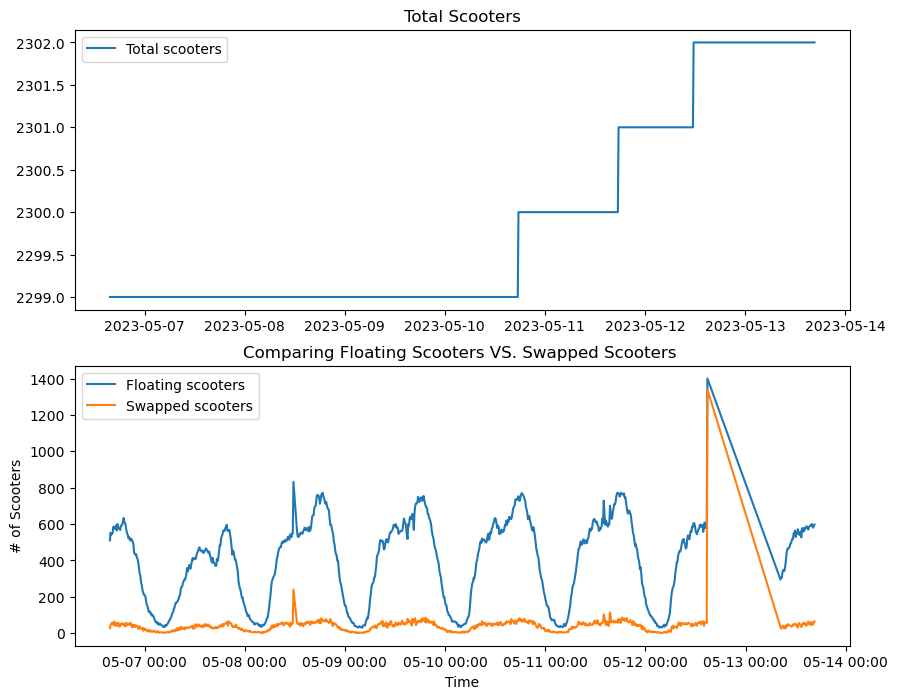

In [130]:
plt.figure(figsize=(10, 8))

plt.subplot (2,1,1)
plt.plot(time_t, total_count, label='Total scooters')
plt.legend()
plt.title('Total Scooters')
plt.subplot (2,1,2)
plt.plot(time_f, floating_count, label='Floating scooters')
plt.plot(time_s, swapped_count, label='Swapped scooters' )
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d %H:%M'))
plt.title('Comparing Floating Scooters VS. Swapped Scooters ')

plt.legend()
plt.xlabel('Time')
plt.ylabel('# of Scooters')


In [142]:
# check for their time frames
f_dataframe=pd.DataFrame({'time':time_f, 'floating_count':floating_count})
s_dataframe=pd.DataFrame({'time':time_s, 'swapped_count':swapped_count})
f_dataframe['time'].isin([s_dataframe['time']]).sum()
# merge those two
merged_dataframe = pd.merge(f_dataframe, s_dataframe, on='time')

In [145]:
sorted_dataframe_1 = merged_dataframe.sort_values(by='floating_count', ascending=False)
sorted_dataframe_2 = merged_dataframe.sort_values(by='swapped_count', ascending=False)


In [146]:
sorted_dataframe_1

time  floating_count  swapped_count
852 2023-05-12 14:50:30            1401           1340
264 2023-05-08 11:40:30             832            240
728 2023-05-11 18:10:30             773             63
723 2023-05-11 17:20:30             772             57
302 2023-05-08 18:40:30             772             69
..                  ...             ...            ...
787 2023-05-12 04:00:30              31              1
353 2023-05-09 03:10:30              31              1
358 2023-05-09 04:00:30              31              3
359 2023-05-09 04:10:30              31              2
783 2023-05-12 03:20:30              30              3

[903 rows x 3 columns]

In [197]:
# Extract the first and second timestamps from 'sorted_dataframe_1'
first_timestamp = sorted_dataframe_1['time'].iloc[0]
second_timestamp = sorted_dataframe_1['time'].iloc[1]
# Define the filtering conditions

scooter_data_remove['create_time'] = pd.to_datetime(scooter_data_remove['create_time'])
scooter_data_swapped['create_time'] = pd.to_datetime(scooter_data_swapped['create_time'])

# Apply the filtering conditions to the DataFrame

scooter_data_remove_ = scooter_data_remove[(scooter_data_remove['create_time'] < first_timestamp) & ~(scooter_data_remove['create_time'] == second_timestamp)]

# Apply the filtering conditions to the DataFrame

scooter_data_swapped_ = scooter_data_swapped[(scooter_data_swapped['create_time'] < first_timestamp) & ~(scooter_data_swapped['create_time'] == second_timestamp)]



Text(0, 0.5, '# of Scooters')

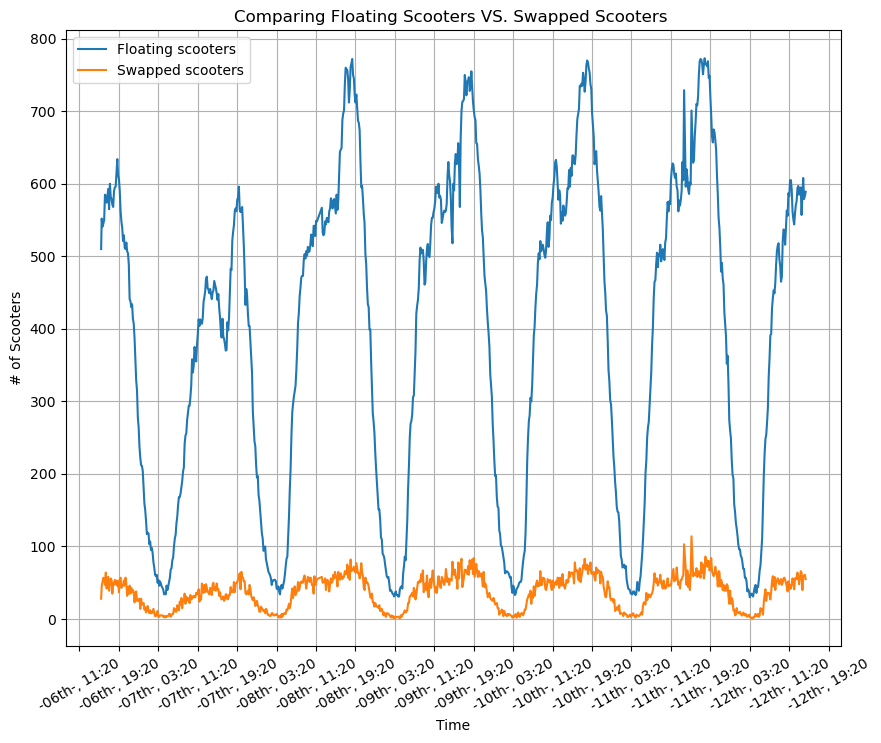

In [201]:
[time_f, floating_count]=scooter_count(scooter_data_remove_)
[time_s, swapped_count]=scooter_count(scooter_data_swapped_)

plt.figure(figsize=(10, 8))
plt.plot(time_f, floating_count, label='Floating scooters')
plt.plot(time_s, swapped_count, label='Swapped scooters' )
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('-%dth-, %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=480))
plt.title('Comparing Floating Scooters VS. Swapped Scooters ')
plt.xticks(rotation=30)
plt.grid(True)

plt.legend()
plt.xlabel('Time')
plt.ylabel('# of Scooters')


### save removed scooter and swapped scooter in csv files

In [198]:
scooter_data_remove_.reset_index(inplace=True)
scooter_data_remove_.drop(columns=['index','id'], inplace=True)
scooter_data_swapped_.reset_index(inplace=True)
scooter_data_swapped_.drop(columns=['index','id'], inplace=True)

scooter_data_remove_.to_csv('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/scooter_data_remove_.csv')     
scooter_data_swapped_.to_csv('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/scooter_data_swapped_.csv')     

/var/folders/r3/yyv6b4257cz1wxtwcbkbd2sm0000gn/T/ipykernel_66811/1613585374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scooter_data_remove_.drop(columns=['index','id'], inplace=True)
/var/folders/r3/yyv6b4257cz1wxtwcbkbd2sm0000gn/T/ipykernel_66811/1613585374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scooter_data_swapped_.drop(columns=['index','id'], inplace=True)
